# <u>Submission instructions</u>
### Submission must be in pairs, unless otherwise authorized.
#### Submit by 28/2/2024

<ul style="font-size: 17px">
<li> This notebook contains all the questions. You should follow the instructions below.</li>
<li> Solutions for both theoretical and practical parts should be written in this notebook</li>
</ul>

<h3> Moodle submission</h3>


<p style="font-size: 17px">
You should submit three files:
</p>
<ul style="font-size: 17px">
<li>IPYNB notebook:
  <ul>
  <li>All the wet and dry parts, including code, graphs, discussion, etc.</li>
  </ul>
</li>
<li>PDF file:
  <ul>
  <li>Export the notebook to PDF. Make sure that all the cells are visible.</li>
  </ul>
</li>
<li>Pickle file:
  <ul>
    <li>As requested in Q2.a</li>
  </ul>
</li>
</ul>
<p style="font-size: 17px">
All files should be in the following format: "HW1_ID1_ID2.file"
<br>
Good Luck!
</p>

<h1> Question 1</h1>

## I. Softmax Derivative (10pt)

<p style="font-size: 17px">
Derive the gradients of the softmax function and demonstrate how the expression can be reformulated solely by using the softmax function, i.e., in some expression where only $softmax(x)$, but not $x$, is present).
Recall that the softmax function is defined as follows:
$$softmax(x)_i = \frac{e^{x_i}}{\sum_{j=1}^{N} e^{x_j}}$$


$$softmax(x)_i = \frac{e^{x_i}}{\sum_{j=1}^{N} e^{x_j}}$$


### I. Softmax Derivative - Answer:
$$\frac{\partial softmax(x)_i}{\partial x_k} = \frac{\partial \frac{e^{x_i}}{\sum_{j=1}^{N} e^{x_j}}}{\partial x_k}$$
$$when\ i = j$$
$$\frac{\partial softmax(x)_i}{\partial x_k} = softmax(x)_i \cdot (1 - softmax(x)_i)$$
$$when\ i \neq j$$
$$\frac{\partial softmax(x)_i}{\partial x_k} = -softmax(x)_i \cdot softmax(x)_k$$


## II. Cross-Entropy Gradient (10pt)
<p style="font-size: 17px">
Derive the gradient of cross-entropy loss with regard to the inputs of a softmax function. i.e., find the gradients with respect to the softmax input vector $\theta$, when the prediction is denoted by $\hat{y} = softmax(\theta)$. 


<p style="font-size: 17px">where $y$ is the one-hot label vector, and $\hat{y}$ is the predicted probability vector for all classes. 

$$\hat{y} = softmax(\theta)$$

Remember the cross entropy function is:
$$CE(y, \hat{y}) = -\sum_i y_i log(\hat{y_i})$$

### II. Cross-Entropy Gradient - Answer

<!--- write your answer -->
$$\frac{\partial CE(y, \hat{y})}{\partial\theta} = \frac{\partial CE(y, \hat{y})}{\partial\hat{y}}\frac{\partial\hat{y}}{\partial\theta} = \frac{\partial -\sum_i y_i log(\hat{y_i})}{\partial\theta}$$

\begin{align*}
\frac{\partial CE}{\partial \theta_k} &= \frac{\partial}{\partial \theta_k} \sum_{j=1}^n (-y_j \log(\sigma(\theta_j))) \\
&= - \sum_{j=1}^n y_j \frac{\partial}{\partial \theta_k} \log(\sigma(\theta_j)) & &\text{...addition rule, } -y_j \text{ is constant}\\
&= - \sum_{j=1}^n y_j \frac{1}{\sigma(\theta_j)}  \frac{\partial}{\partial \theta_k}\sigma(\theta_j) & &\text{...chain rule}\\
&= -y_k \frac{\sigma(\theta_k)(1-\sigma(\theta_k))}{\sigma(\theta_k)} + \sum_{j\neq k} y_j \frac{\sigma(\theta_k)\sigma(\theta_j)}{\sigma(\theta_j)} & &\text{...consider both } j=k \text{ and } j\neq k \\
&= -y_k (1-\sigma(\theta_k)) + \sum_{j\neq k} y_j \sigma(\theta_k) \\
&= -y_k + y_k\sigma(\theta_k) + \sum_{j\neq k} y_j \sigma(\theta_k) \\
&= -y_k + \sigma(\theta_k) \sum_j y_j. \\
\end{align*}



\begin{align*}
\Rightarrow \frac{\partial CE}{\partial \theta_k} &= \sigma(\theta_k) - y_k
\end{align*}

# Question 2

## I. Derivative Of Activation Functions (10pt)

<p style="font-size: 17px">
The following cell contains an implementation of some activation functions. Implement the corresponding derivatives.</p>

In [3]:
import torch

def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

def tanh(x):
    return torch.div(torch.exp(x) - torch.exp(-x), torch.exp(x) + torch.exp(-x))


def softmax(x):
    exp_x = torch.exp(x.T - torch.max(x, dim=-1).values).T  # Subtracting max(x) for numerical stability
    return exp_x / exp_x.sum(dim=-1, keepdim=True)

c:\Users\hadar\AppData\Local\Programs\Python\Python37\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
def d_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))


def d_tanh(x):
    return 1 - (tanh(x)**2)


def d_softmax(x):
    """_summary_

    Args:
        x (_type_): _description_

    Returns:
        _type_: _description_
    """
    s = softmax(x)
    batch_size, n_classes = s.shape
    # Initialize the Jacobian matrix for each sample in the batch
    jacobian_m = torch.zeros((batch_size, n_classes, n_classes))
    
    for i in range(batch_size):
        for j in range(n_classes):
            for k in range(n_classes):
                if j == k:
                    jacobian_m[i, j, k] = s[i, j] * (1 - s[i, j])
                else:
                    jacobian_m[i, j, k] = -s[i, j] * s[i, k]
    return jacobian_m


def cross_entropy_derivative(y_hat, y):
    return y_hat - y

## II. Train a Fully Connected network on MNIST (30pt)

<p style="font-size: 17px">In the following exercise, you will create a classifier for the MNIST dataset.
You should write your own training and evaluation code and meet the following
constraints:
<ul>
<li> You are only allowed to use torch tensor manipulations.</li>
<li> You are NOT allowed to use:
  <ul>
  <li> Auto-differentiation - backward()</li>
  <li> Built-in loss functions</li>
  <li> Built-in activations</li>
  <li> Built-in optimization</li>
  <li> Built-in layers (torch.nn)</li>
  </ul>
  </li>
</ul>
</h4>


<p style="font-size: 17px">
 a) The required classifier class is defined.
<ul style="font-size: 17px">
<li> You should implement the backward pass of the model.
<li> Train the model and plot the model's accuracy and loss (both on train and test sets) as a function of the epochs.
<li> You should save the model's weights and biases. Change the student_ids to yours.
</ul>
<p style="font-size: 17px">In this section, you <b>must</b> use the "set_seed" function with the given seed and <b>sigmoid</b> as an activation function.
</p>

In [6]:
import torch
import torchvision
from torch.utils.data import DataLoader

import os
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
import torch.nn.functional as F

# Constants
SEED = 42
EPOCHS = 16
BATCH_SIZE = 32
NUM_OF_CLASSES = 10

# Setting seed
def set_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    os.environ["PYTHONHASHSEED"] = str(seed)


# Transformation for the data
transform = torchvision.transforms.Compose(
    [torchvision.transforms.ToTensor(),
     torch.flatten])

# Cross-Entropy loss implementation
def one_hot(y, num_of_classes=10):
    hot = torch.zeros((y.size()[0], num_of_classes))
    hot[torch.arange(y.size()[0]), y] = 1
    return hot

def cross_entropy(y, y_hat):
    return -torch.sum(one_hot(y) * torch.log(y_hat)) / y.size()[0]

In [7]:
# Create dataloaders
train_dataset = torchvision.datasets.MNIST(root='./data', train=True,
                                            download=True, transform=transform)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE)


test_dataset = torchvision.datasets.MNIST(root='./data', train=False,
                                           download=True, transform=transform)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE)

In [8]:

class FullyConnectedNetwork:
    def __init__(self, input_size, output_size, hidden_size1, activation_func = sigmoid, lr=0.01):
        # parameters
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size1 = hidden_size1

        # activation function
        self.activation_func = activation_func

        # weights
        self.W1 = torch.randn(self.input_size, self.hidden_size1)
        self.b1 = torch.zeros(self.hidden_size1)

        self.W2 = torch.randn(self.hidden_size1, self.output_size)
        self.b2 = torch.zeros(self.output_size)

        self.lr = lr

    def forward(self, x):
        self.z1 = torch.matmul(x, self.W1) + self.b1
        self.h1 = self.activation_func(self.z1)
        self.z2 = torch.matmul(self.h1, self.W2) + self.b2
        self.y_hat = softmax(self.z2)
        return self.y_hat

    def backward(self, x, y, y_hat):
        # Ensure y is one-hot encoded to match y_hat's shape
        # Assuming y is not one-hot encoded, convert it using torch.nn.functional.one_hot
        y_one_hot = torch.nn.functional.one_hot(y, num_classes=self.output_size).to(torch.float32)
        lr = self.lr
        batch_size = y.size(0)
        # Simplified derivative for cross-entropy with softmax
        dl_dz2 =  cross_entropy_derivative(y_hat=y_hat,y=y_one_hot)
        dl_dW2 = torch.matmul(torch.t(self.h1), dl_dz2)
        dl_db2 = torch.matmul(torch.t(dl_dz2), torch.ones(batch_size))
        
        dl_dh = torch.matmul(dl_dz2, torch.t(self.W2)) 
        dl_dz1 = dl_dh * d_sigmoid(self.z1) 
        
        dl_dW1 = torch.matmul(torch.t(x), dl_dz1) 
        dl_db1 = torch.matmul(torch.t(dl_dz1), torch.ones(batch_size))
       

        #gradient step
        self.W1 -= lr*dl_dW1 
        self.b1 -= lr*dl_db1
        self.W2 -= lr*dl_dW2
        self.b2 -= lr*dl_db2

    def train(self, X, y):
        # forward + backward pass for trainig a model
        o = self.forward(X)
        self.backward(X, y, o)
            

In [9]:
set_seed(SEED)
model = FullyConnectedNetwork(784, 10, 128, sigmoid, lr=0.01)

Epoch: 1 (15 to go)




Epoch: 2 (14 to go)


Epoch: 3 (13 to go)


Epoch: 4 (12 to go)


Epoch: 5 (11 to go)


Epoch: 6 (10 to go)


Epoch: 7 (9 to go)


Epoch: 8 (8 to go)


Epoch: 9 (7 to go)


Epoch: 10 (6 to go)


Epoch: 11 (5 to go)


Epoch: 12 (4 to go)


Epoch: 13 (3 to go)


Epoch: 14 (2 to go)


Epoch: 15 (1 to go)


Epoch: 16 (0 to go)




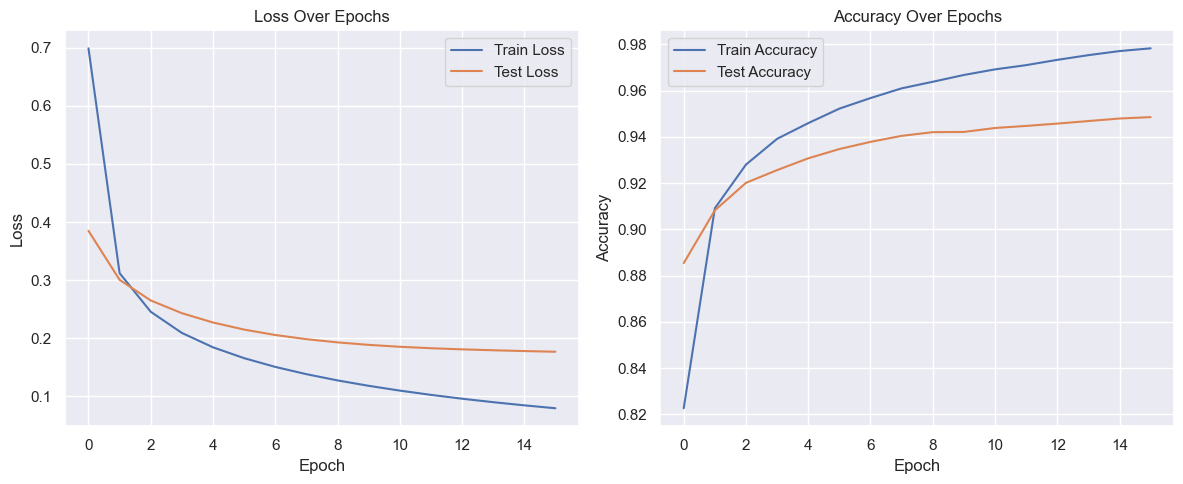

In [10]:
# Initialize history lists for tracking progress
history = {
    'train_loss': [],
    'train_accuracy': [],
    'test_loss': [],
    'test_accuracy': []
}

# Function to calculate metrics for a given dataloader
def calculate_metrics(dataloader, mode='train'):
    total_loss, total_correct, total_samples = 0, 0, 0
    for X_batch, y_batch in dataloader:
        y_hat = model.forward(x=X_batch)
        loss = cross_entropy(y=y_batch, y_hat=y_hat)
        _, predicted = torch.max(y_hat, 1)

        # Check if `y_batch` is one-hot encoded and convert if necessary
        if y_batch.ndimension() > 1:
            y_batch = y_batch.argmax(dim=1)
        
        # Calculate the number of correct predictions
        correct = (predicted == y_batch).sum().item()

        
        # Accumulate batch results
        total_loss += loss * len(y_batch)
        total_correct += correct
        total_samples += X_batch.size(0)
        
        # Backpropagation for training mode
        if mode == 'train':
            model.backward(x=X_batch, y=y_batch, y_hat=y_hat)
    
    # Calculate and store epoch metrics
    history[f'{mode}_loss'].append(total_loss / total_samples)
    history[f'{mode}_accuracy'].append(total_correct / total_samples)

# Function to plot the training and testing loss and accuracy
def plot_metrics(history):
    plt.figure(figsize=(12, 5))
    
    # Plot training and testing loss
    plt.subplot(1, 2, 1)
    plt.plot(history['train_loss'], label='Train Loss')
    plt.plot(history['test_loss'], label='Test Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    # Plot training and testing accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history['train_accuracy'], label='Train Accuracy')
    plt.plot(history['test_accuracy'], label='Test Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()


# Training and testing the model
for epoch in range(EPOCHS):
    print(f'Epoch: {epoch+1} ({EPOCHS - (epoch+1)} to go)')
    
    calculate_metrics(train_dataloader, 'train')
    calculate_metrics(test_dataloader, 'test')
    print('\n')


plot_metrics(history)

In [11]:
students_ids = "318880754_206567067"
torch.save({"W1": model.W1, "W2": model.W2, "b1": model.b1, "b2": model.b2}, f"HW1_{students_ids}.pkl")

<p style="font-size: 17px"> b) Train the model with various learning rates (at least 3).
<ul style="font-size: 17px">
<li> Plot the model's accuracy and loss (both on train and test sets) as a function of the epochs.
<li>Discuss the differences in training with different learning rates. Support your answer with plots.

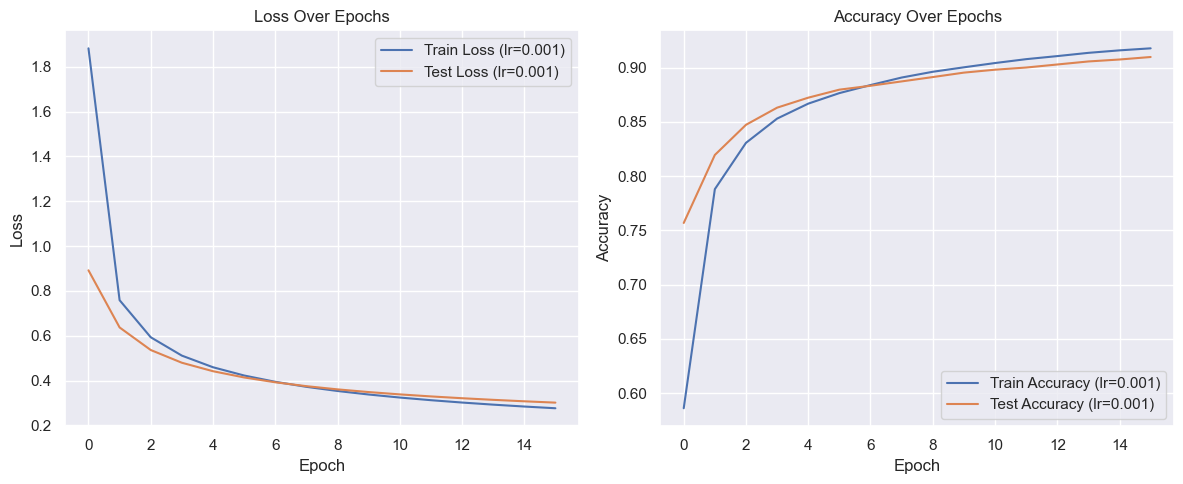

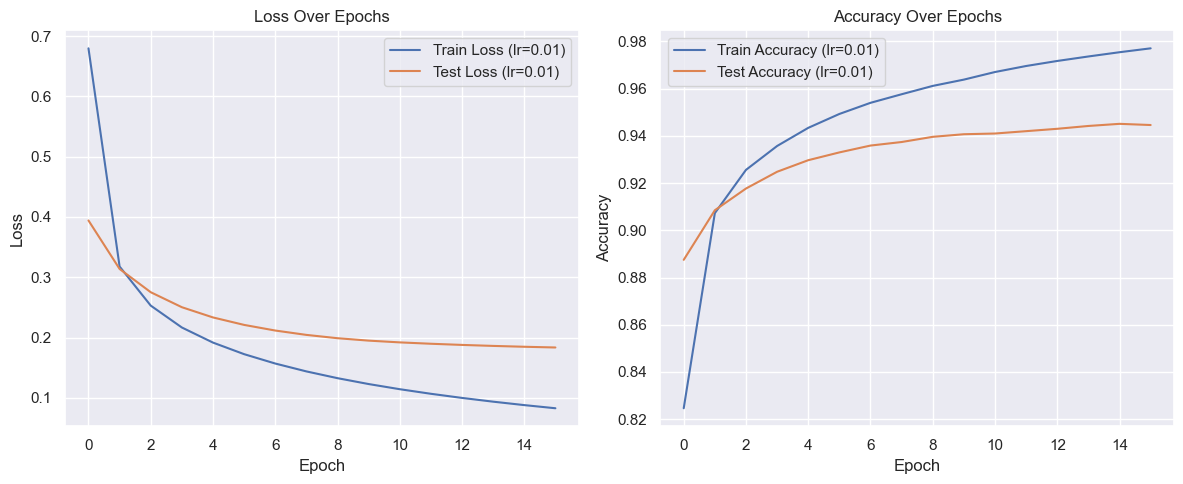

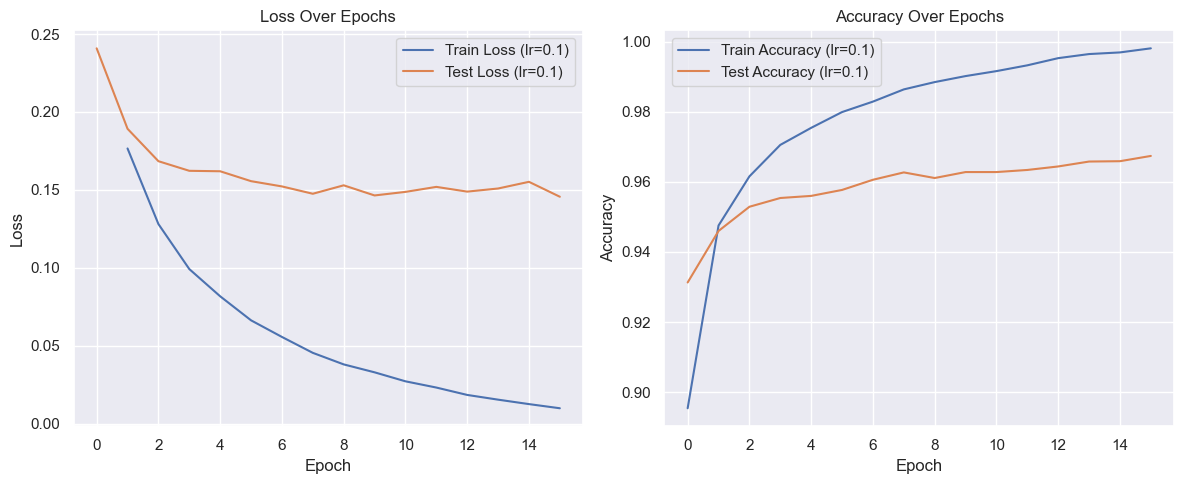

In [12]:
# Define the learning rates to test
learning_rates = [0.001, 0.01, 0.1]

# Define a dictionary to hold the history for each learning rate
histories = {}

# Loop over each learning rate
for lr in learning_rates:
    # Initialize the model with the current learning rate
    model = FullyConnectedNetwork(input_size=784, output_size=10, hidden_size1=128, lr=lr)
    # Initialize the history
    history = {
        'train_loss': [],
        'train_accuracy': [],
        'test_loss': [],
        'test_accuracy': []
    }
    
    # Train the model
    for epoch in range(EPOCHS):
        calculate_metrics(train_dataloader, 'train')
        calculate_metrics(test_dataloader, 'test')
        
    # Save the history for this learning rate
    histories[lr] = history

# Now plot the accuracy and loss for each learning rate
for lr, history in histories.items():
    plt.figure(figsize=(12, 5))
    
    # Plot training and testing loss
    plt.subplot(1, 2, 1)
    plt.plot(history['train_loss'], label=f'Train Loss (lr={lr})')
    plt.plot(history['test_loss'], label=f'Test Loss (lr={lr})')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    # Plot training and testing accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history['train_accuracy'], label=f'Train Accuracy (lr={lr})')
    plt.plot(history['test_accuracy'], label=f'Test Accuracy (lr={lr})')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()


The plots demonstrate how different learning rates impact model training and generalization. A lower learning rate of 0.001 results in a steady but slow convergence, indicating careful updates that prevent overshooting the optimal solution with minimal overfitting, as evidenced by the close test and training loss. A tenfold increase to 0.01 accelerates convergence but starts to show signs of overfitting with a larger gap between training and test accuracy. A further increase to 0.1 leads to rapid initial improvements but ultimately results in poor generalization and potential overfitting, as the test loss plateaus and the test accuracy remains lower than for smaller learning rates. These observations underscore the trade-off between convergence speed and generalization when selecting an appropriate learning rate for neural network training.

# Question 3

## I. Implement and Train a CNN (30pt)

<p style="font-size: 17px"> You are a data scientist at a supermarket. Your manager asked you to write a new image classifiaction algorithem for the self checkout cashiers. The images are of products from your grocery store (dataset files are attched in the Moodle).
<br>
Your code and meet the following constraints:
<ul style="font-size: 17px">
<li> Your classifier must be CNN based</li>
<li> You are not allowed to use any pre-trained model</li>
</ul>
<br>
<p style="font-size: 17px">
In order to satisfy your boss you have to reach 65% accuracy on the test set. You will get a bonus for your salary (and 10 points to your grade) if your model's number of paramters is less than 100K. You can reutilize code from the tutorials.


<ul style="font-size: 17px">
<li>Train the model and plot the model's accuracy and loss (both on train and validation sets) as a function of the epochs. </li>
<li>Report the test set accurecy.</li>
<li>Discus the progress you made and describe your final model.</li>

In [80]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
import pandas as pd
import torch.nn.functional as F
import os
from torchvision.io import read_image
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
# Load the CSV file to inspect its content
classes_df = pd.read_csv('GroceryStoreDataset/classes.csv')
num_classes = classes_df['Coarse Class ID (int)'].nunique()

class GroceryModel(nn.Module):
    def __init__(self, num_classes=num_classes,drop_prob=0.5):
        super(GroceryModel, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        )
        self.layer2 = self._make_layer(64, 128, 2, stride=1)
        self.layer3 = self._make_layer(128, 256, 2, stride=2)
        self.layer4 = self._make_layer(256, 512, 2, stride=2)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512, num_classes)
        self.dropout = nn.Dropout(0.5)

    def _make_layer(self, in_channels, out_channels, blocks, stride):
        layers = []
        layers.append(nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1))
        layers.append(nn.BatchNorm2d(out_channels))
        layers.append(nn.ReLU())
        for _ in range(1, blocks):
            layers.append(nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1))
            layers.append(nn.BatchNorm2d(out_channels))
            layers.append(nn.ReLU())
        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.dropout(x)
        x = self.fc(x)
        return x


In [97]:
class GroceryStoreDataset(Dataset):
    def __init__(self, annotations_file, root_dir, transform=None):
        with open(annotations_file, 'r') as file:
            self.img_labels = [line.strip().split(', ') for line in file.readlines()]
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        # Corrected to access list elements by index
        img_path = os.path.join(self.root_dir, self.img_labels[idx][0])
        image = Image.open(img_path).convert('RGB')  # Load as PIL Image and convert to RGB
        label = int(self.img_labels[idx][1])  # Convert label to integer
        if self.transform:
            image = self.transform(image)
        return image, label


# Define your transformations
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),  # Now it's okay to convert from PIL Image to Tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Create dataset instances
train_dataset = GroceryStoreDataset(
    annotations_file='GroceryStoreDataset/train.txt',
    root_dir='GroceryStoreDataset',
    transform=transform
)

test_dataset = GroceryStoreDataset(
    annotations_file='GroceryStoreDataset/test.txt',
    root_dir='GroceryStoreDataset',
    transform=transform
)
# Create validation dataset instance
validation_dataset = GroceryStoreDataset(
    annotations_file='GroceryStoreDataset/val.txt',  # Make sure this path is correct
    root_dir='GroceryStoreDataset',  # Adjust if necessary
    transform=transform
)

# Create data loaders
validation_loader = DataLoader(validation_dataset, batch_size=128, shuffle=False)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)



Total number of parameters: 4681899


Epoch 1/85, Train Loss: 2.7922, Train Accuracy: 0.2602, Validation Loss: 10.6347, Validation Accuracy: 0.1182
Epoch 2/85, Train Loss: 2.1663, Train Accuracy: 0.3538, Validation Loss: 9.2328, Validation Accuracy: 0.1588
Epoch 3/85, Train Loss: 1.9211, Train Accuracy: 0.4212, Validation Loss: 6.2377, Validation Accuracy: 0.1959
Epoch 4/85, Train Loss: 1.7376, Train Accuracy: 0.4428, Validation Loss: 3.0319, Validation Accuracy: 0.2905
Epoch 5/85, Train Loss: 1.5695, Train Accuracy: 0.5000, Validation Loss: 2.6398, Validation Accuracy: 0.3345
Epoch 6/85, Train Loss: 1.4199, Train Accuracy: 0.5379, Validation Loss: 2.4291, Validation Accuracy: 0.3615
Epoch 7/85, Train Loss: 1.3546, Train Accuracy: 0.5682, Validation Loss: 2.7968, Validation Accuracy: 0.3581
Epoch 8/85, Train Loss: 1.2493, Train Accuracy: 0.5864, Validation Loss: 2.4475, Validation Accuracy: 0.4054
Epoch 9/85, Train Loss: 1.1402, Train Accuracy: 0.6261, Validation Loss: 3.0114, Validation Accuracy: 0.2838
Epoch 10/85, Train

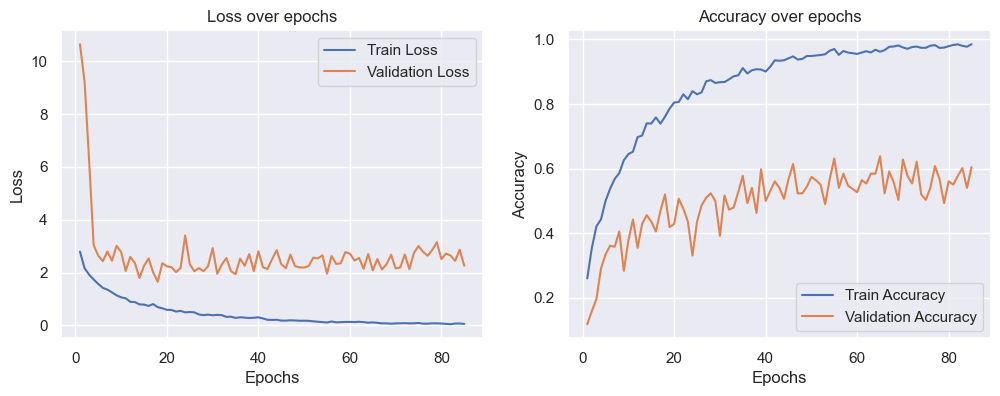

In [103]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = GroceryModel(num_classes=num_classes).to(device) 
# optimizer = optim.Adam(model.parameters(), lr=0.09) 
optimizer = optim.SGD(model.parameters(), lr=0.07, momentum=0.9)
criterion = nn.CrossEntropyLoss()
total_params = sum(p.numel() for p in model.parameters())
print(f'Total number of parameters: {total_params}')

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []
EPOCHS = 85

for epoch in range(EPOCHS):
    model.train()
    train_loss = 0
    correct_train = 0
    total_train = 0
    
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs.data, 1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)
    
    avg_train_loss = train_loss / total_train
    train_accuracy = correct_train / total_train
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)
    
    # Validation phase
    model.eval()
    val_loss = 0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for images, labels in validation_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs.data, 1)
            correct_val += (predicted == labels).sum().item()
            total_val += labels.size(0)
    
    avg_val_loss = val_loss / total_val
    val_accuracy = correct_val / total_val
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)
    
    print(f'Epoch {epoch+1}/{EPOCHS}, '
          f'Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, '
          f'Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')

# Plotting the training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, EPOCHS+1), train_losses, label='Train Loss')
plt.plot(range(1, EPOCHS+1), val_losses, label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, EPOCHS+1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, EPOCHS+1), val_accuracies, label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


After trialing different architectures and epoch durations, we settled on a ResNet-like model structure. The provided plots indicate a high learning rate, as seen by the significant initial drop in training loss that levels out, while validation loss shows considerable fluctuations. Such erratic validation accuracy suggests the learning rate may be too high, causing the model to overshoot optimal minima. A lower learning rate might smooth out validation loss and improve generalization, as evidenced by the discrepancy between training and validation accuracy.

In [104]:
# Test phase
model.eval()
test_loss = 0
correct_test = 0
total_test = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs.data, 1)
        correct_test += (predicted == labels).sum().item()
        total_test += labels.size(0)

avg_test_loss = test_loss / total_test
test_accuracy = correct_test / total_test

print(f'Test Loss: {avg_test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')


Test Loss: 1.8870, Test Accuracy: 0.6588


In [105]:
torch.save(model.state_dict(), 'CNN_model_state_dict.pth')

# when you want to load the model for inference or further training, you'll need to create an instance of the model class and then load the state dictionary into this instance
# model = GroceryModel(num_classes=num_classes).to(device)

# # Load the state dictionary
# model.load_state_dict(torch.load(model_save_path))

# # Set the model to evaluation mode
# model.eval()



## II. Analyzing a Pre-trained CNN (Filters) (10pt)

In this part, you are going to analyze a (large) pre-trained model. Pre-trained models are quite popular these days, as big companies can train really large models on large datasets (something that personal users can't do as they lack the sufficient hardware). These pre-trained models can be used to fine-tune on other/small datasets or used as components in other tasks (like using a pre-trained classifier for object detection).

All pre-trained models expect input images normalized in the same way, i.e. mini-batches of 3-channel RGB images of shape (3 x H x W), where H and W are expected to be at least 224. The images have to be loaded in to a range of [0, 1] and then normalized using mean = [0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225].

You can use the following transform to normalize:

<code>normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])</code>
<a href="https://pytorch.org/vision/stable/models.html">Read more here</a>


1. Load a pre-trained VGG16 with PyTorch using torchvision.models.vgg16(pretrained=True, progress=True, **kwargs) (<a href="https://pytorch.org/vision/stable/models.html#classification">read more here</a>). Don't forget to use the model in evaluation mode (<code>model.eval()</code>).

2. Load the images in the 'birds' folder and display them.

3. Pre-process the images to fit VGG16's architecture. What steps did you take?

4. Feed the images (forward pass) to the model. What are the outputs?

5. Choose an image of a dog in the 'dogs' folder, display it and feed it to network. What are the outputs?

6. For the first 3 filters in the first layer of VGG16, plot the filters, and then plot their response (their output) for the image from question 5. Explain your observations.

## 1


In [62]:
import torchvision.models as models

# Load the pre-trained VGG16 model
vgg16 = models.vgg16(pretrained=True, progress=True)

# Use the model in evaluation mode
vgg16.eval()



VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

## 2

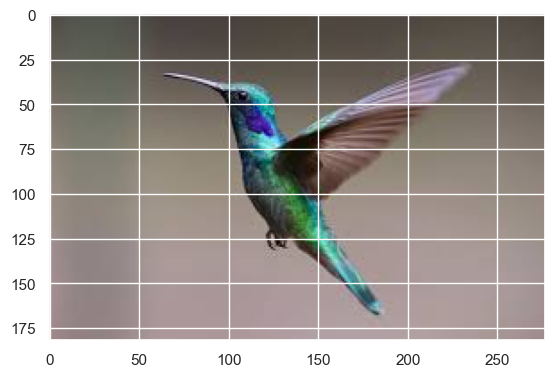

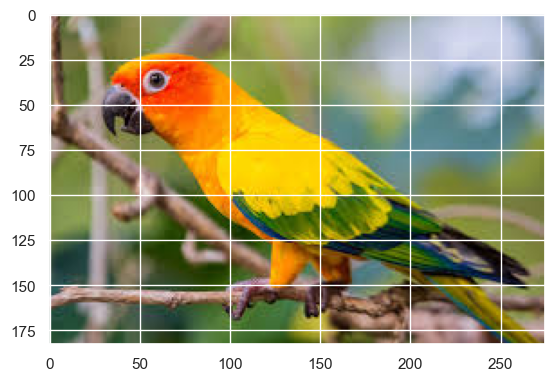

In [63]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the images
bird_images = [Image.open(f'birds/bird_{i}.jpg') for i in range(2)]

# Display the images
for img in bird_images:
    plt.imshow(img)
    plt.show()


## 3 

In [64]:
from torchvision import transforms
import torch

# Define the transformation
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Apply the transformation to each bird image
bird_tensors = [preprocess(img) for img in bird_images]

## steps taken:
1. resizing to 256 pixels
2. cropping to 224 pixels
3. converting to tensor
4. normalizing - By subtracting the mean and dividing by the standard deviation for each channel, the pixel values of an input image are standardized to have a mean of 0 and a standard deviation of 1. This process is known as feature scaling, and it makes the optimization landscape smoother, which is beneficial for training the model.


## 4

In [65]:
# Add an extra batch dimension and pass the image through the model
with torch.no_grad():  # We don't need gradients for evaluation
    outputs = [vgg16(img.unsqueeze(0)) for img in bird_tensors]

# The outputs are the class probabilities
for out in outputs:
    print(out)


tensor([[ 2.7060e+00,  5.0277e+00,  2.9450e+00, -2.4856e-02,  2.4988e+00,
          5.6518e+00, -3.4072e-01,  3.1121e+00,  1.6135e+00,  2.4929e+00,
          9.1234e+00,  6.1760e+00,  7.7521e+00,  6.6037e+00,  1.1655e+01,
          7.8751e+00,  1.3027e+01,  1.2279e+01,  1.1689e+01,  1.0140e+01,
          1.5392e+01,  1.3191e+01,  1.8790e+00,  5.6937e+00,  4.0444e+00,
          6.2261e-01,  4.5118e+00, -2.2118e-01, -1.2594e+00,  3.5354e+00,
          3.3018e+00,  2.1493e+00,  3.5794e+00,  2.7929e+00,  4.5813e+00,
          1.6225e+00,  5.0983e+00, -2.6581e+00,  5.2292e+00,  1.2032e+00,
          1.0537e+01,  6.8741e+00,  1.1330e+01,  8.1567e+00,  6.2877e+00,
         -1.1993e+00,  9.1111e+00,  1.1892e+01, -2.2449e-01, -8.4637e-01,
         -6.9902e-01,  4.0637e+00,  3.5153e+00,  5.4052e+00,  7.5434e-01,
          4.2801e+00, -5.1978e-01, -1.6011e+00,  3.9177e+00,  1.2785e+01,
          3.0190e+00, -1.9027e+00,  8.6624e-01,  6.0651e+00,  8.1334e+00,
          5.0426e+00,  5.2342e+00,  2.

## Answer: The outputs are the class probabilities



# 5

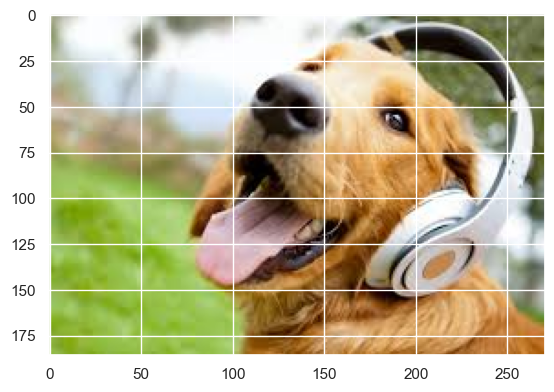

tensor([[-9.3060e-01, -1.5955e+00, -2.9181e+00, -4.1349e+00, -2.8313e+00,
         -2.4859e+00, -3.1912e+00, -2.7256e+00, -1.1700e+00, -2.7315e+00,
         -2.8770e+00, -1.5801e+00, -4.0232e+00, -4.2405e+00, -2.6859e+00,
         -2.8089e+00, -3.9026e+00, -2.3800e+00, -2.5218e+00, -3.2893e+00,
         -2.9577e+00, -1.5593e+00, -2.3144e+00, -2.4575e+00, -3.1204e+00,
         -1.3885e+00, -1.6896e+00, -6.0798e-01, -1.2195e+00, -1.8533e+00,
         -2.4155e+00, -7.8195e-01, -5.7745e-01, -2.2821e+00, -2.4605e+00,
         -3.5580e+00, -1.9797e+00, -2.1328e+00, -3.2781e+00, -4.5888e+00,
         -3.6562e+00, -4.3453e+00, -2.5557e+00, -2.4689e+00, -4.7558e+00,
         -3.4266e+00, -4.4510e+00, -2.2288e+00, -3.7720e+00, -5.1290e+00,
         -4.6302e+00, -8.4347e-01, -7.2791e-01, -1.0448e+00, -3.1612e+00,
         -2.6060e+00, -3.5917e+00, -3.3642e+00, -3.0165e+00, -1.0052e+00,
         -1.7103e+00, -1.3729e+00, -8.7586e-01,  4.4460e-01, -8.2738e-01,
          3.1337e-02, -1.8670e+00, -3.

In [74]:
# Assume the dog image is loaded similarly to the bird images
dog_image = Image.open('dogs/dog_1.jpg')

# Display the dog image
plt.imshow(dog_image)
plt.show()

# Preprocess the image
dog_tensor = preprocess(dog_image)

# Add an extra batch dimension and pass the image through the model
with torch.no_grad():
    dog_output = vgg16(dog_tensor.unsqueeze(0))

# Output from the model
print(dog_output)


## Answer: The outputs are the class probabilities

# 6

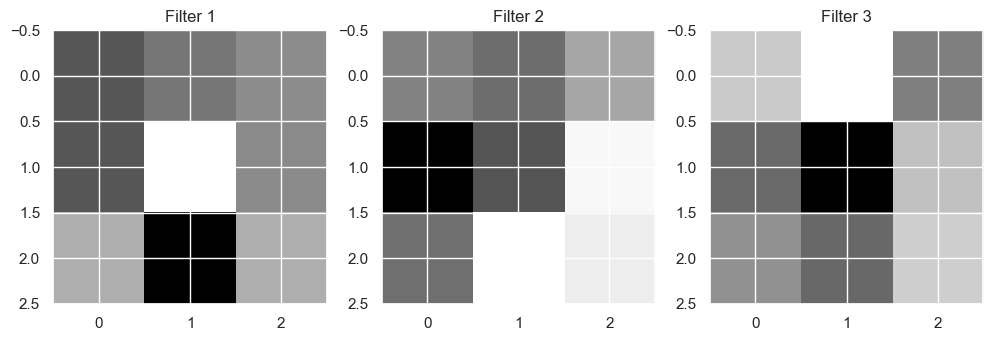

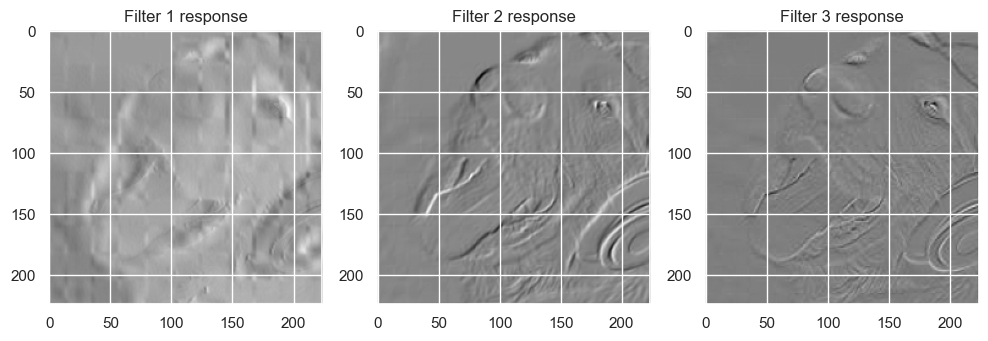

In [76]:
# Access the filters in the first convolutional layer
filters = vgg16.features[0].weight.data.cpu().clone()

# Plot the first 3 filters
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
for i, ax in enumerate(axs.flat):
    # The filters have shape [out_channels, in_channels, kernel_height, kernel_width]
    # Since they are convolving RGB images, in_channels = 3. We'll take the mean to visualize them.
    ax.imshow(torch.mean(filters[i], dim=0), cmap='gray')
    ax.set_title(f'Filter {i+1}')
plt.show()

# Get the response from the first layer for the dog image
dog_image_prepared = dog_tensor.unsqueeze(0).to(next(vgg16.parameters()).device)
response = vgg16.features[:1](dog_image_prepared)

# Plot the response of the first 3 filters
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
for i, ax in enumerate(axs.flat):
    ax.imshow(response[0, i].cpu().detach().numpy(), cmap='gray')
    ax.set_title(f'Filter {i+1} response')
plt.show()


Filter 1 Response: The activation map indicates that this filter is likely sensitive to horizontal or near-horizontal edges. You can see the bright regions where the horizontal edges of the image features are located.

Filter 2 Response: This filter seems to respond to another set of features, possibly edges with a different orientation or a specific texture pattern. The activations are not as uniform as Filter 1, suggesting it might be detecting more complex features.

Filter 3 Response: The response here is more dispersed across the image, which could mean that this filter is detecting a broader range of features or perhaps is sensitive to a particular texture that is distributed more uniformly in the image.